In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving kicksharing.csv to kicksharing.csv


Описание данных

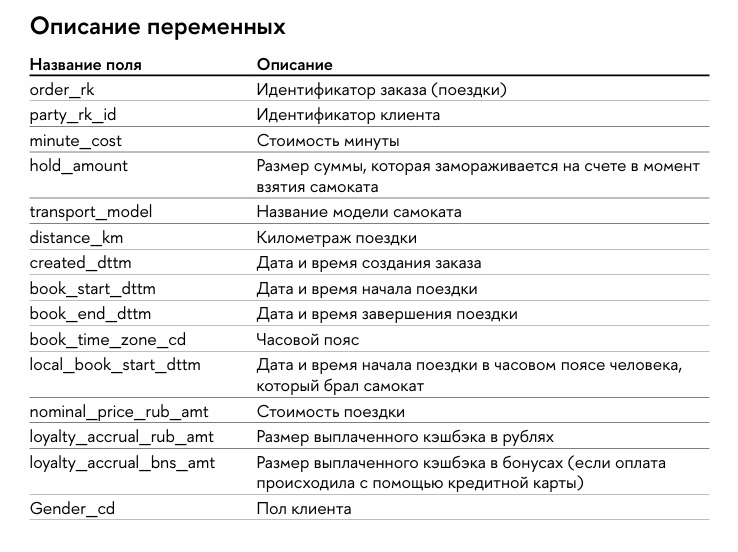

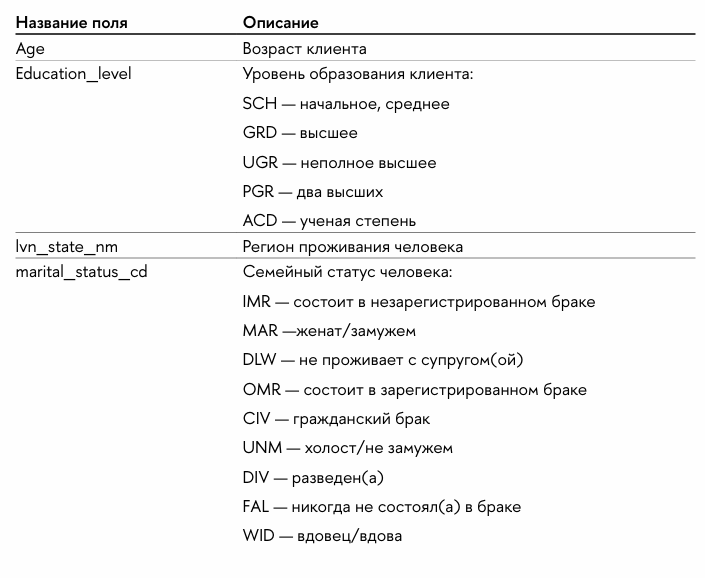

# Смотрим формат данных, выбросы, типы данных. Проводим очистку для работы.

In [ ]:
t_scooter = pd.read_csv("kicksharing.csv")
t_scooter.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [ ]:
t_scooter.shape

(396749, 20)

# Информацию об отсутствии данных заполним No info

In [ ]:
t_scooter['education_level_cd'] = t_scooter['education_level_cd'].fillna('No info')

# Заметили несколько проблем:

1.   distance_km имеет выбросы большие, обрежем данные, чтобы они не вносили вклад в анализ.
2.   loyalty_accrual_rub_amt есть отрицательные значения, что недопустимо в кэшбеке



In [ ]:
t_scooter.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


In [ ]:
t_scooter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       396749 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [ ]:
t_scooter = t_scooter[t_scooter['distance_km'] < 1000]
t_scooter = t_scooter[t_scooter['loyalty_accrual_rub_amt'] > 0]
t_scooter.shape

(366928, 20)

# Данные готовы для анализа

In [ ]:
t_scooter.describe()

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.669280e+05,3.669280e+05,366928.000000,366928.000000,366928.000000,366928.000000,366928.000000,366928.000000,366928.000000,366928.000000,4.000000
mean,2.893277e+08,6.011216e+08,31.495533,7.291231,42.658287,299.985556,2.685098,3.526479,129.665931,37.511188,38.750000
std,3.813619e+07,3.308219e+08,9.410900,1.289217,11.945656,1.845661,8.503857,1.199261,98.834804,75.155690,18.246004
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,2.500000,0.200000,14.000000
25%,2.618163e+08,3.004387e+08,24.000000,6.490000,30.000000,300.000000,0.980814,3.000000,81.960000,11.240000,32.000000
50%,2.704375e+08,6.112704e+08,31.000000,7.490000,50.000000,300.000000,1.762419,3.000000,104.900000,18.730000,42.000000
75%,3.432681e+08,8.650667e+08,37.000000,8.220000,50.000000,300.000000,3.094791,3.000000,143.810000,35.060000,48.750000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,974.885850,12.000000,5627.640000,3185.000000,57.000000


# Распределение количества аренд по регионам РФ

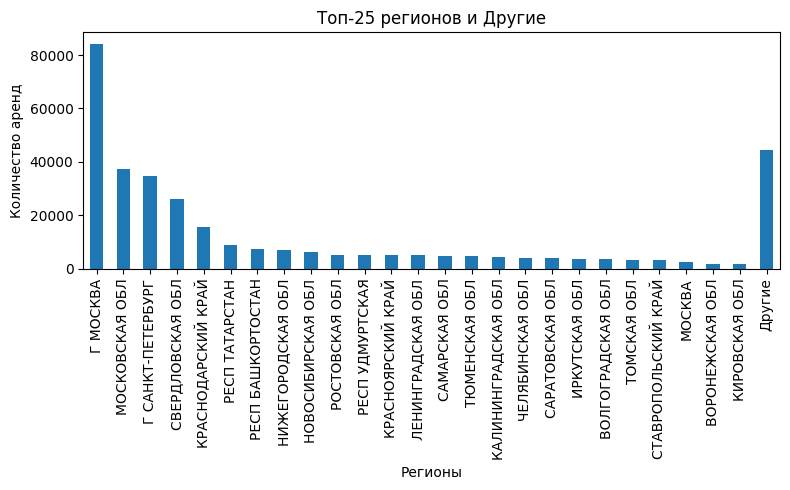

In [ ]:
counts_reg = t_scooter['lvn_state_nm'].value_counts()
top25 = counts_reg.head(25)
top25['Другие'] = counts_reg.iloc[25:].sum()


top25.plot(
    kind='bar',
    figsize=(8,5),
    title='Топ-25 регионов и Другие'
)
plt.ylabel('Количество аренд')
plt.xlabel('Регионы')
plt.tight_layout()
plt.show()

# Зависимость количества аренд от уровня образования

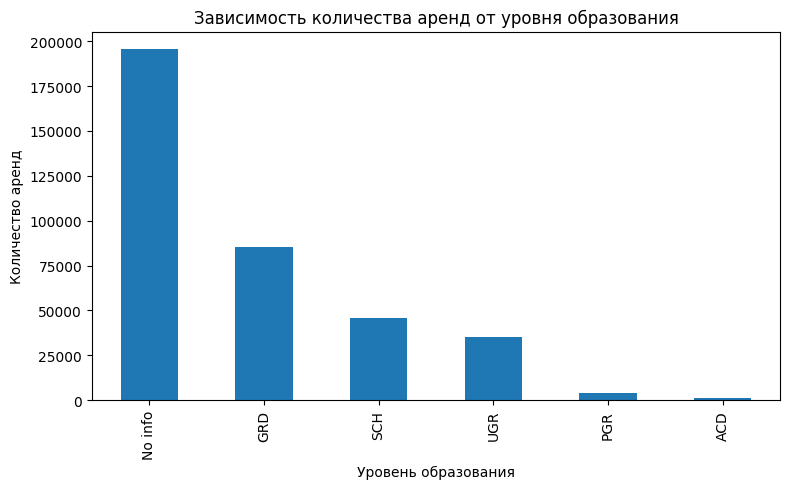

In [ ]:
count_edu = t_scooter['education_level_cd'].value_counts()

count_edu.plot(
    kind='bar',
    figsize=(8,5),
    title='Зависимость количества аренд от уровня образования'
)
plt.ylabel('Количество аренд')
plt.xlabel('Уровень образования')
plt.tight_layout()
plt.show()

# Зависимость от пола количества аренд

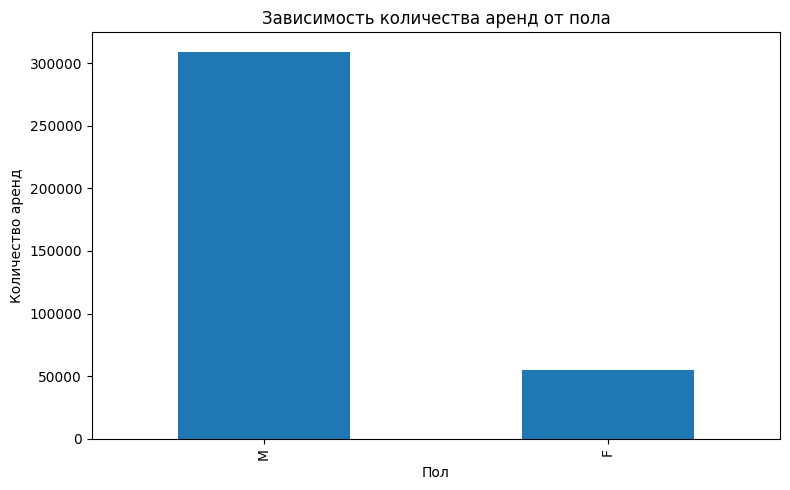

In [ ]:
count_gender = t_scooter['gender_cd'].value_counts()

count_gender.plot(
    kind='bar',
    figsize=(8,5),
    title='Зависимость количества аренд от пола'
)
plt.ylabel('Количество аренд')
plt.xlabel('Пол')
plt.tight_layout()
plt.show()

# Зависимость аренд от времени дня

In [ ]:
t_scooter['local_book_start_dttm'].dtypes

dtype('O')

In [ ]:
t_scooter['local_book_start_dttm'] = pd.to_datetime(
    t_scooter['local_book_start_dttm'],
    format='%Y-%m-%d %H:%M:%S.%f',
    errors='coerce'
)
t_scooter['local_book_start_dttm'].dtypes

dtype('<M8[ns]')

<ipython-input-15-a82d75277a62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_book_start_dttm'] = df['local_book_start_dttm'].dt.hour


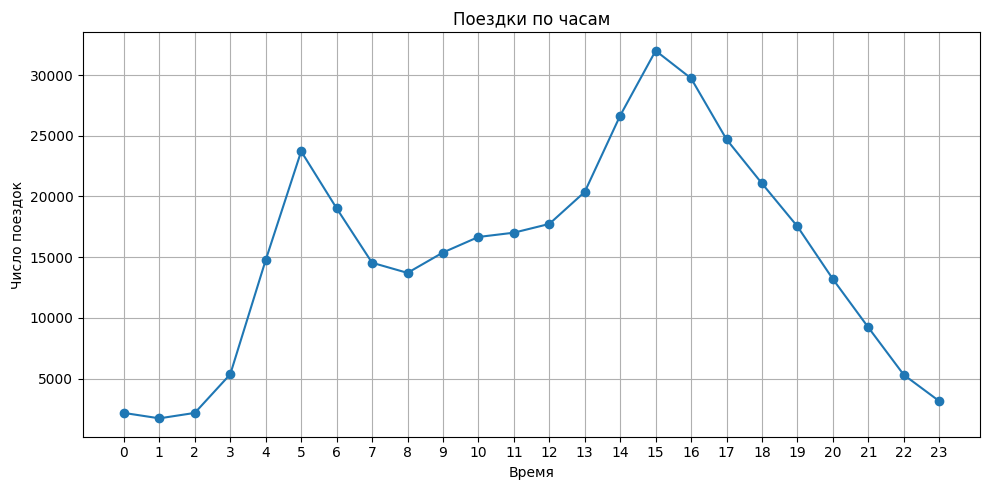

In [ ]:
df = t_scooter[['local_book_start_dttm','order_rk']]
df['local_book_start_dttm'] = df['local_book_start_dttm'].dt.hour
df = df.groupby('local_book_start_dttm')['order_rk'].count().sort_index()

plt.figure(figsize=(10,5))
df.plot(
    x=df.index,
    y=df.values,
    marker='o',
    linestyle='-',
    title='Поездки по часам'
)

plt.xlabel('Время')
plt.xticks([i for i in range(0,24,1)])
plt.ylabel('Число поездок')
plt.grid()
plt.tight_layout()
plt.show()

# Завимисоть аренд по месяцам

<ipython-input-16-9e1f3a48d8ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_book_start_dttm'] = df['local_book_start_dttm'].dt.month


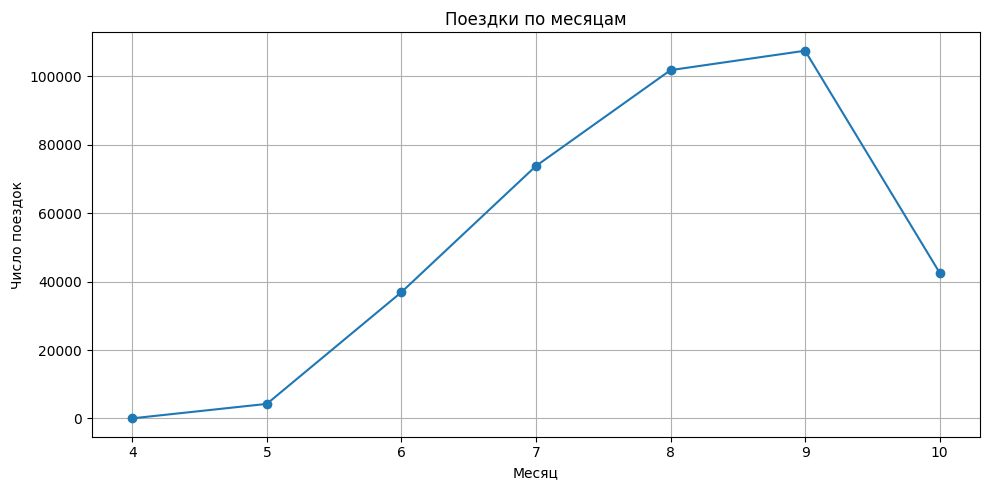

In [ ]:
df = t_scooter[['local_book_start_dttm','order_rk']]
df['local_book_start_dttm'] = df['local_book_start_dttm'].dt.month
df = df.groupby('local_book_start_dttm')['order_rk'].count().sort_index()

plt.figure(figsize=(10,5))
df.plot(
    x=df.index,
    y=df.values,
    marker='o',
    linestyle='-',
    title='Поездки по месяцам'
)

plt.xlabel('Месяц')
plt.ylabel('Число поездок')
plt.grid()
plt.tight_layout()
plt.show()

# Количества поездок по дистанции

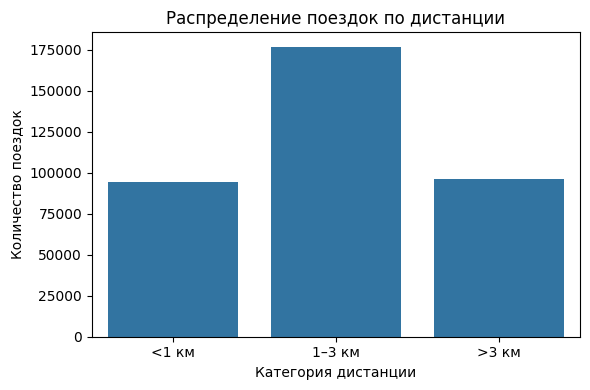

In [ ]:
bins  = [0, 1, 3, t_scooter['distance_km'].max()]
labels = ['<1 км', '1–3 км', '>3 км']
t_scooter['dist_cat'] = pd.cut(
    t_scooter['distance_km'],
    bins=bins,
    labels=labels,
    right=False
)

dist_counts = t_scooter['dist_cat'].value_counts(normalize=False).reindex(labels)
plt.figure(figsize=(6,4))
sns.barplot(
    x=dist_counts.index,
    y=dist_counts.values
)
plt.title('Распределение поездок по дистанции')
plt.xlabel('Категория дистанции')
plt.ylabel('Количество поездок')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Зависимость количества поездок от возрастной группы

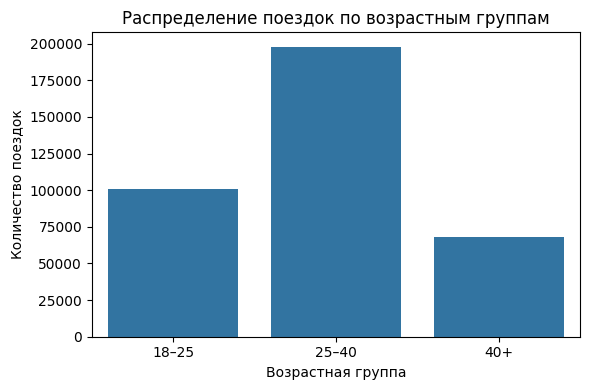

In [ ]:
bins   = [18, 25, 40, t_scooter['age'].max()+1]
labels = ['18–25', '25–40', '40+']

age_groups = pd.cut(
    t_scooter['age'],
    bins=bins,
    labels=labels,
    right=False
)


age_counts = age_groups.value_counts().reindex(labels)
plt.figure(figsize=(6,4))
sns.barplot(
    x=age_counts.index,
    y=age_counts.values
)
plt.title('Распределение поездок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество поездок')
plt.tight_layout()
plt.show()

# Валовая выручка от возрастной группы

<ipython-input-28-d73eb3c26de5>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_group')['gross_revenue']


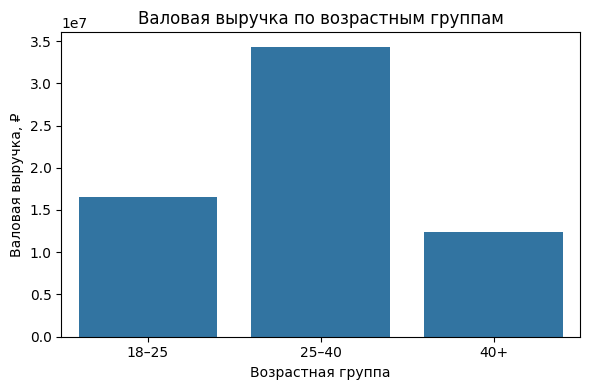

In [ ]:
t_scooter['gross_revenue'] = t_scooter['nominal_price_rub_amt'] + t_scooter['activation_cost']

bins   = [18, 25, 40, t_scooter['age'].max() + 1]
labels = ['18–25', '25–40', '40+']
age_grp = pd.cut(t_scooter['age'], bins=bins, labels=labels, right=False)

rev_by_age = (
    t_scooter
    .assign(age_group=age_grp)
    .dropna(subset=['age_group'])
    .groupby('age_group')['gross_revenue']
    .sum()
    .reindex(labels)
)


plt.figure(figsize=(6,4))
sns.barplot(x=rev_by_age.index, y=rev_by_age.values)
plt.title('Валовая выручка по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Валовая выручка, ₽')
plt.tight_layout()
plt.show()

# Выводы:
1. Возраст 25–40 лет — «золотой сегмент».
На них приходится ~54 % всех поездок и ≈ 60 % валовой выручки → основная монетизация, целесообразно запускать новые фичи именно для этой когорты.

2. Два выраженных пика спроса.
Утренний — 4–6 ч, дневной — 14–17 ч. Открывает окно для динамического тарифа: night‑discount вне пиков и peak‑uplift в часы максимальной загрузки.

3. Основная дистанция — 1–3 км (≈ 45 % всех сессий).
Тарифную сетку нужно оптимизировать под короткие городские поездки, а не под дальние маршруты.

4. География супер‑сконцентрирована.
Москва + Московская обл. дают 25 % поездок, топ‑5 регионов — 55 %. Локальные промо‑акции в столичном кластере дают максимальный ROI.

5. Половая диспропорция.
Мужчины совершают ~85 % поездок. В женской аудитории виден потенциал роста через кастомные офферы и улучшение ощущения безопасности.

6. Сильная сезонность.
Экспоненциальный рост с апреля, пик в сентябре, спад в октябре. Нужно заранее наращивать флот к лету и поддерживать retention‑механику на «низком» сезоне.